In [ ]:
!pip install tensorflow keras numpy pandas opencv-python kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jyothishal","key":"2419a40c98e3d3399c51806a4ed792da"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0726.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0727.jpg  
  inflating: dataset/Training/glioma/Tr-gl_0728.jpg  
  inflating: dataset/Training/g

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 89s 575ms/step - accuracy: 0.4416 - loss: 1.9222 - val_accuracy: 0.1586 - val_loss: 1.6404
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 73s 511ms/step - accuracy: 0.6400 - loss: 0.8790 - val_accuracy: 0.4663 - val_loss: 1.2745
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 74s 518ms/step - accuracy: 0.7253 - loss: 0.6912 - val_accuracy: 0.6494 - val_loss: 0.9423
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 74s 515ms/step - accuracy: 0.7726 - loss: 0.5880 - val_accuracy: 0.4356 - val_loss: 1.5746
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 73s 511ms/step - accuracy: 0.7767 - loss: 0.5601 - val_accuracy: 0.2892 - val_loss: 6.0079
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 82s 513ms/step - accuracy: 0.8116 - loss: 0.4897 - val_accuracy: 0.6354 - val_loss: 1.0068
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 73s 511ms/step - accuracy: 0.8289 - loss: 0.4434

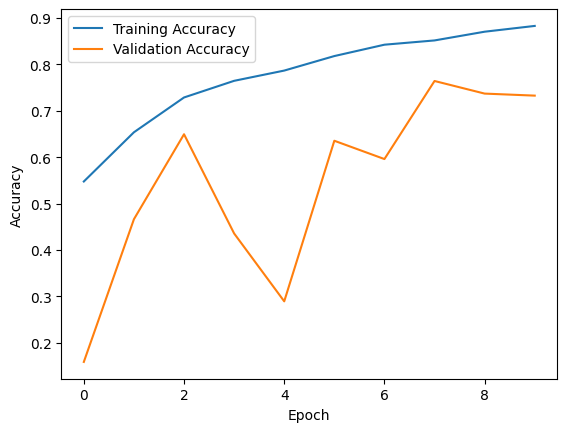

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = (227, 227)  # Original AlexNet input size
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 4

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/Training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/dataset/Training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset/Testing',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# AlexNet model
def alexnet_model():
    model = Sequential()

    # Original AlexNet layers
    model.add(Conv2D(96, (11, 11), strides=4, activation='relu',
                    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3, 3), strides=2))

    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((3, 3), strides=2))

    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((3, 3), strides=2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    return model

model = alexnet_model()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step


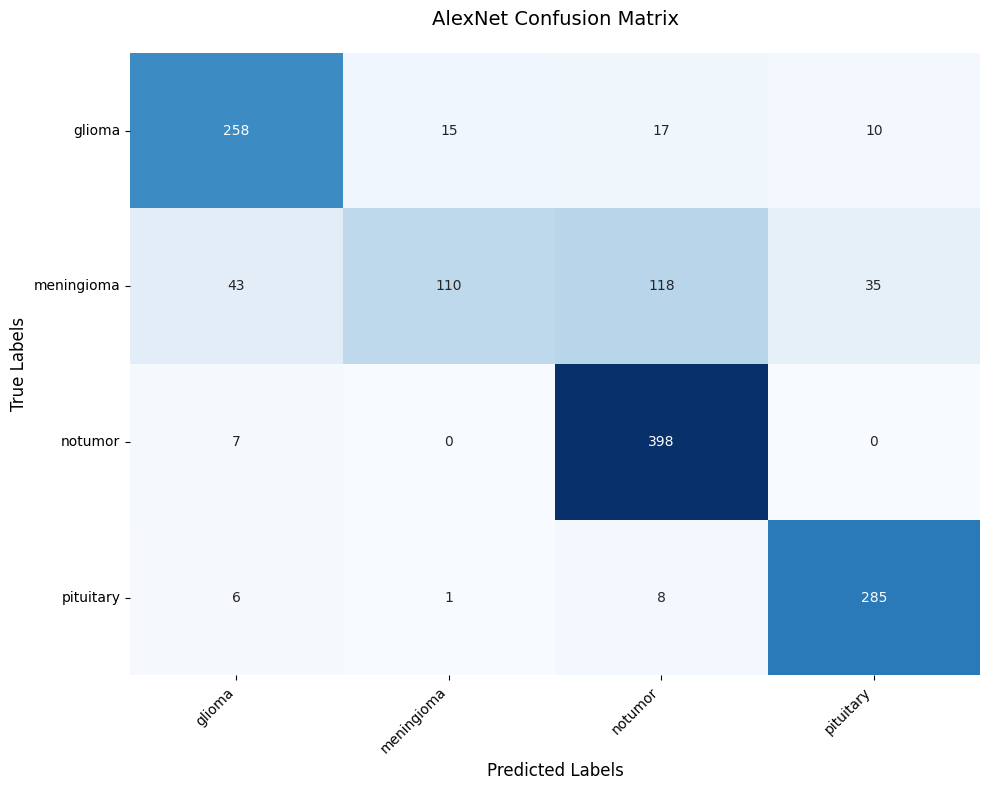


Classification Report:
              precision    recall  f1-score   support

      glioma     0.8217    0.8600    0.8404       300
  meningioma     0.8730    0.3595    0.5093       306
     notumor     0.7357    0.9827    0.8414       405
   pituitary     0.8636    0.9500    0.9048       300

    accuracy                         0.8017      1311
   macro avg     0.8235    0.7880    0.7740      1311
weighted avg     0.8167    0.8017    0.7782      1311



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class names
true_classes = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar=False)
plt.title('AlexNet Confusion Matrix', fontsize=14, pad=20)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save and show
plt.savefig('alexnet_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names, digits=4))